# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np
label_signnames_csv = pd.read_csv("signnames.csv")
y_train_panda = pd.DataFrame({'Name' : pd.Series(1,index=list(range(y_train.shape[0]))),
                              'Sign' : y_train[:],
                             'Count' : pd.Series(1,index=list(range(y_train.shape[0])))})
#Label DataFrame
for indexer in range(0,label_signnames_csv.as_matrix().shape[0]):
    y_train_panda['Name'] = np.where(y_train_panda['Sign']==(label_signnames_csv.as_matrix()[indexer,0]),label_signnames_csv.as_matrix()[indexer,1],y_train_panda['Name'])
y_train_panda.insert(0, 'TrainIndex', range(0,len(y_train_panda)))
#signnames = label_signnames_csv.values[:,1] ## Just use the labels
# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of validation examples
n_validation = y_valid.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train_panda.groupby('Sign').count().shape[0]
#print(y_train_panda.groupby(['Sign','Name']).sum())

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Class 0 is Speed limit (20km/h) with 180 samples in dataset
Examples of Signage in Dataset:


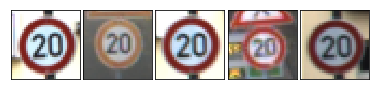

Class 1 is Speed limit (30km/h) with 1980 samples in dataset
Examples of Signage in Dataset:


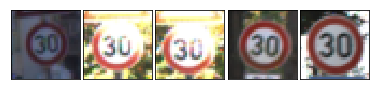

Class 2 is Speed limit (50km/h) with 2010 samples in dataset
Examples of Signage in Dataset:


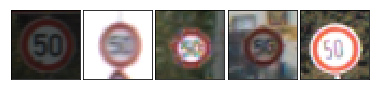

Class 3 is Speed limit (60km/h) with 1260 samples in dataset
Examples of Signage in Dataset:


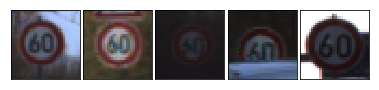

Class 4 is Speed limit (70km/h) with 1770 samples in dataset
Examples of Signage in Dataset:


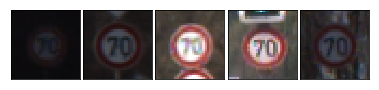

Class 5 is Speed limit (80km/h) with 1650 samples in dataset
Examples of Signage in Dataset:


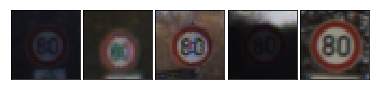

Class 6 is End of speed limit (80km/h) with 360 samples in dataset
Examples of Signage in Dataset:


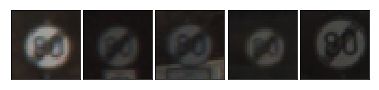

Class 7 is Speed limit (100km/h) with 1290 samples in dataset
Examples of Signage in Dataset:


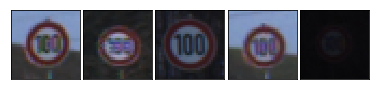

Class 8 is Speed limit (120km/h) with 1260 samples in dataset
Examples of Signage in Dataset:


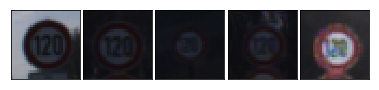

Class 9 is No passing with 1320 samples in dataset
Examples of Signage in Dataset:


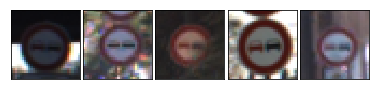

Class 10 is No passing for vehicles over 3.5 metric tons with 1800 samples in dataset
Examples of Signage in Dataset:


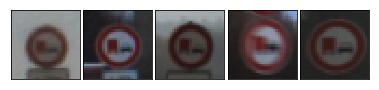

Class 11 is Right-of-way at the next intersection with 1170 samples in dataset
Examples of Signage in Dataset:


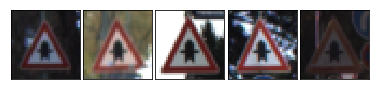

Class 12 is Priority road with 1890 samples in dataset
Examples of Signage in Dataset:


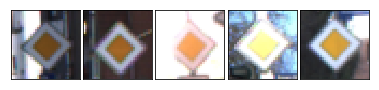

Class 13 is Yield with 1920 samples in dataset
Examples of Signage in Dataset:


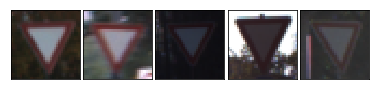

Class 14 is Stop with 690 samples in dataset
Examples of Signage in Dataset:


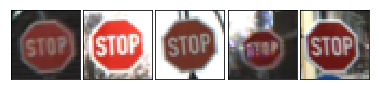

Class 15 is No vehicles with 540 samples in dataset
Examples of Signage in Dataset:


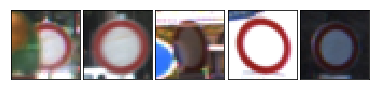

Class 16 is Vehicles over 3.5 metric tons prohibited with 360 samples in dataset
Examples of Signage in Dataset:


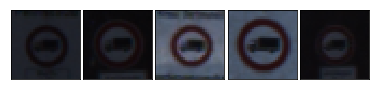

Class 17 is No entry with 990 samples in dataset
Examples of Signage in Dataset:


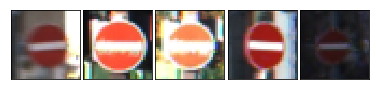

Class 18 is General caution with 1080 samples in dataset
Examples of Signage in Dataset:


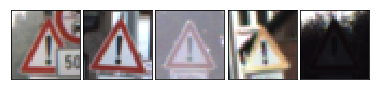

Class 19 is Dangerous curve to the left with 180 samples in dataset
Examples of Signage in Dataset:


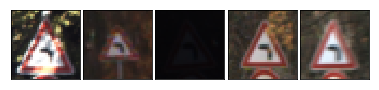

Class 20 is Dangerous curve to the right with 300 samples in dataset
Examples of Signage in Dataset:


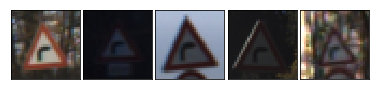

Class 21 is Double curve with 270 samples in dataset
Examples of Signage in Dataset:


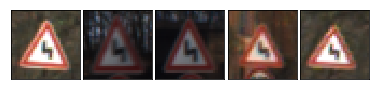

Class 22 is Bumpy road with 330 samples in dataset
Examples of Signage in Dataset:


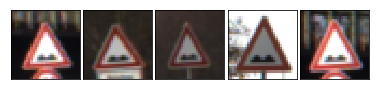

Class 23 is Slippery road with 450 samples in dataset
Examples of Signage in Dataset:


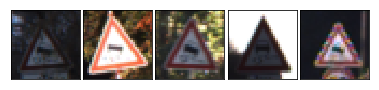

Class 24 is Road narrows on the right with 240 samples in dataset
Examples of Signage in Dataset:


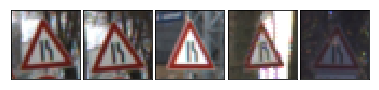

Class 25 is Road work with 1350 samples in dataset
Examples of Signage in Dataset:


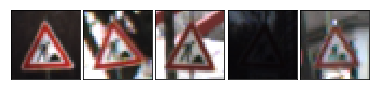

Class 26 is Traffic signals with 540 samples in dataset
Examples of Signage in Dataset:


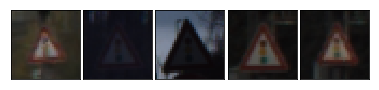

Class 27 is Pedestrians with 210 samples in dataset
Examples of Signage in Dataset:


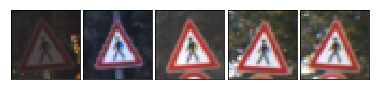

Class 28 is Children crossing with 480 samples in dataset
Examples of Signage in Dataset:


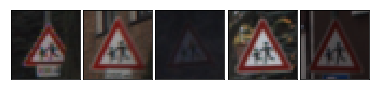

Class 29 is Bicycles crossing with 240 samples in dataset
Examples of Signage in Dataset:


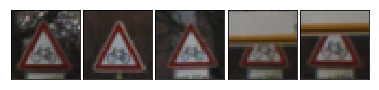

Class 30 is Beware of ice/snow with 390 samples in dataset
Examples of Signage in Dataset:


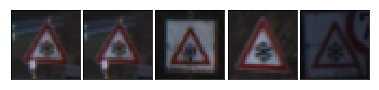

Class 31 is Wild animals crossing with 690 samples in dataset
Examples of Signage in Dataset:


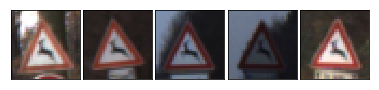

Class 32 is End of all speed and passing limits with 210 samples in dataset
Examples of Signage in Dataset:


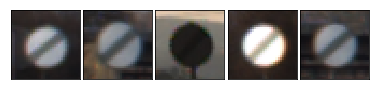

Class 33 is Turn right ahead with 599 samples in dataset
Examples of Signage in Dataset:


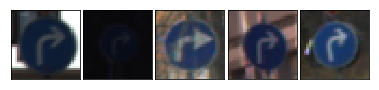

Class 34 is Turn left ahead with 360 samples in dataset
Examples of Signage in Dataset:


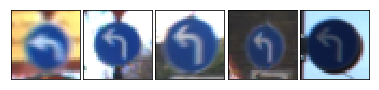

Class 35 is Ahead only with 1080 samples in dataset
Examples of Signage in Dataset:


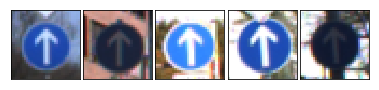

Class 36 is Go straight or right with 330 samples in dataset
Examples of Signage in Dataset:


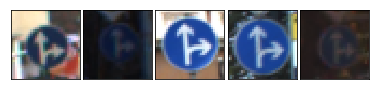

Class 37 is Go straight or left with 180 samples in dataset
Examples of Signage in Dataset:


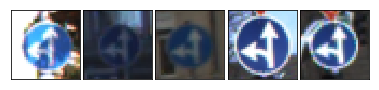

Class 38 is Keep right with 1860 samples in dataset
Examples of Signage in Dataset:


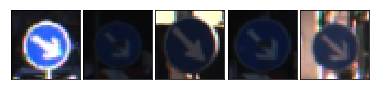

Class 39 is Keep left with 270 samples in dataset
Examples of Signage in Dataset:


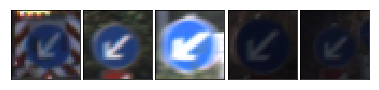

Class 40 is Roundabout mandatory with 300 samples in dataset
Examples of Signage in Dataset:


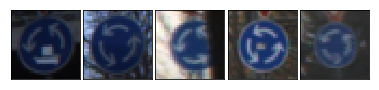

Class 41 is End of no passing with 210 samples in dataset
Examples of Signage in Dataset:


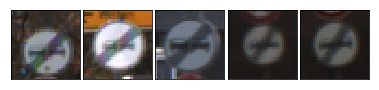

Class 42 is End of no passing by vehicles over 3.5 metric tons with 210 samples in dataset
Examples of Signage in Dataset:


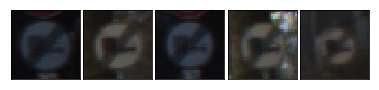

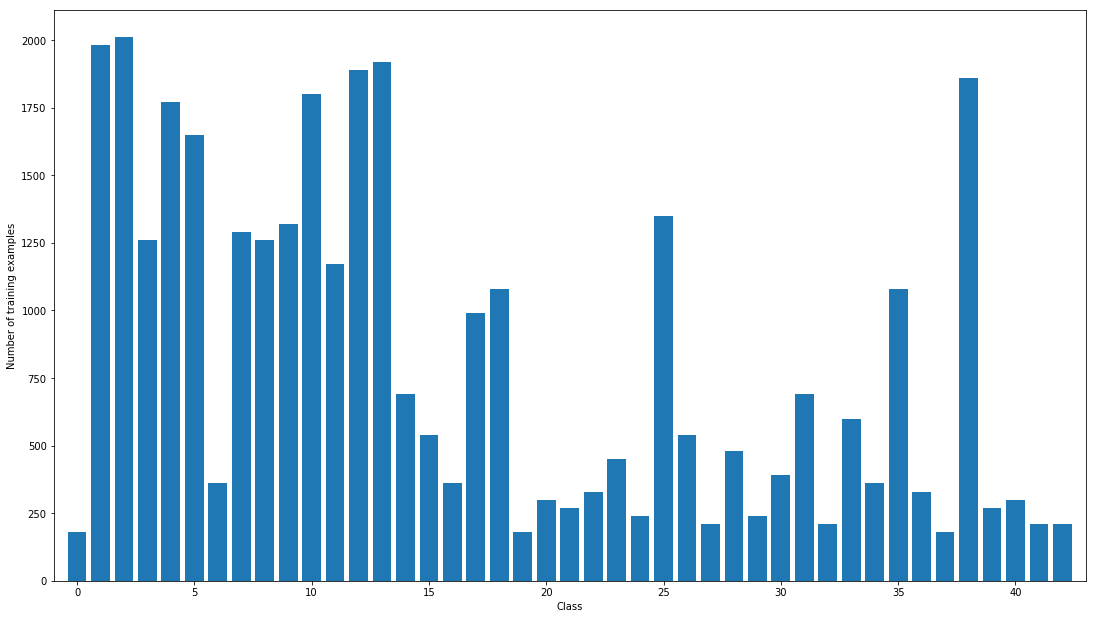

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline
grouped =  y_train_panda.groupby('Sign')[['Count']].sum()
#print()
#print(label_signnames_csv.as_matrix()[:,1].shape[0])
#Review Dataset
for x in range(0,n_classes):
    print("Class %i is %s with %i samples in dataset"%(label_signnames_csv.as_matrix()[x,0],\
                                                       label_signnames_csv.as_matrix()[x,1],grouped.as_matrix()[x]))
    print("Examples of Signage in Dataset:")
    fig = plt.figure()
    fig.set_size_inches(10,1)
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for y in range(1,6):
        fig.add_subplot(1,10,y,xticks=[],yticks=[]).imshow(X_train[\
            y_train_panda.groupby('Sign').get_group(\
            label_signnames_csv.as_matrix()[x,0]).as_matrix()[random.randrange(grouped.as_matrix()[x]),0]])
    plt.show()   
#plot Historgram of all classes
fig = plt.figure()
y_pos = np.arange(label_signnames_csv.as_matrix()[:,1].shape[0])
plt.bar(y_pos , grouped.as_matrix(), align='center' )
#plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

In [5]:
#source --- Credits to Alexander Kukushkin - Log_progress code taken from https://github.com/alexanderkuk/log-progress

def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from skimage import exposure
from sklearn.utils import shuffle
import warnings
import os.path

def preprocess_images(x,y=None):
    x = 0.2989 * x[:,:,:,0] + 0.5870 * x[:,:,:,1] + 0.1140 * x[:,:,:,2]
    #scale features
    x = (x/255.).astype(np.float32)
    #process histogram to equalize contrasts and balance out exposures for images (CLAHE was used in this case due to recommendation)
    for indexer in log_progress(range(x.shape[0]),every=1,size=None,name="Preprocessing"):
        #https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                x[indexer] = exposure.equalize_adapthist(x[indexer])
    if y is not None:
        #one-hot encoding - preprocessed to save time at runtime
        #should not overfit to input order
        x, y = shuffle(x, y)
        y = np.eye(n_classes)[y]
    # now that the images are processed, reshape to single channel
    return x.reshape(x.shape+(1,)),y



# PreProcess All Datasets
training_file_pre = "train_pre.p"
validation_file_pre="valid_pre.p"
testing_file_pre = "test_pre.p"

print("Preprocessing Validation Set")
if(os.path.exists(validation_file_pre)):
    print("Already Processed")
else:
    X_valid_pre,y_valid_pre=preprocess_images(X_valid,y_valid)
    pickle.dump({"features" : X_valid_pre,
                 "labels" : y_valid_pre}, open(validation_file_pre, "wb" ))
    print("Saved")
print("Preprocessing Test Set")
if(os.path.exists(testing_file_pre)):
    print("Already Processed")
else:
    X_test_pre,y_test_pre=preprocess_images(X_test,y_test)
    pickle.dump({"features" : X_test_pre,
             "labels" : y_test_pre}, open(testing_file_pre, "wb" ))
    print("Saved")
print("Preprocessing Training Set")
if(os.path.exists(training_file_pre)):
    print("Already Processed")
else:
    X_train_pre,y_train_pre=preprocess_images(X_train,y_train)
    pickle.dump({"features" : X_train_pre,
             "labels" : y_train_pre}, open(training_file_pre, "wb" ))
    print("Saved")

Preprocessing Validation Set
Already Processed
Preprocessing Test Set
Already Processed
Preprocessing Training Set
Already Processed


### Model Architecture

In [7]:
### Define your architecture here.
from tensorflow.contrib.layers import flatten

### Feel free to use as many code cells as needed.
def LeNet(x,keep_prob_1,keep_prob_2,keep_prob_3):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
   # Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x50.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 50), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(50))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 32x32x50. Output = 16x16x50.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob =keep_prob_1)
    
    # Layer 2: Convolutional.Input = 16x16x64. Output = 16x16x128.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 50, 100), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(100))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 16x16x128. Output = 8x8x128
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob =keep_prob_2)

    # Layer 3: Convolutional. Output = 8x8x256
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 100, 150), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(150))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b

    # Activation.
    conv3 = tf.nn.relu(conv3)
    '''
    # Pooling. Input = 8x8x256. Output = 4x4x256.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, keep_prob =keep_prob_3)
    '''
 
    ### Combining outputs from all sizes similar to paper by Pierre Sermanet and Yann LeCun 
    # Repool to equalize results.
    #conv1 output needs a K size of 1 to become 8x8
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 1, 1, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv2 is already an 8x8
    #conv2 = tf.nn.max_pool(conv2, ksize=[1, 1, 1, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Flatten. Input = 8x8x150 + 8x8x100 + 8x8x50. Output = 7168
    dims = conv1.get_shape().as_list()
    conv1 = tf.reshape(conv1, [-1, dims[1] * dims[2] * dims[3]])
    dims = conv2.get_shape().as_list()
    conv2 = tf.reshape(conv2, [-1, dims[1] * dims[2] * dims[3]])
    dims = conv3.get_shape().as_list()
    conv3 = tf.reshape(conv3, [-1, dims[1] * dims[2] * dims[3]])
    fc0  = tf.concat(1,[conv1,conv2,conv3])

    # Layer 4: Fully Connected. Input = 19200. Output = 1024
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(19200, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Layer 5: Fully Connected. Input = 1024. Output = 300.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 300), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(300))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 6: Fully Connected. Input = 300. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(300, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
import pickle

### Train your model here.
#Load Proprocessed Data
training_file_pre = "train_pre.p"
validation_file_pre="valid_pre.p"
testing_file_pre = "test_pre.p"
with open(training_file_pre, mode='rb') as f:
    train_pre = pickle.load(f)
with open(validation_file_pre, mode='rb') as f:
    valid_pre = pickle.load(f)
with open(testing_file_pre, mode='rb') as f:
    test_pre = pickle.load(f)
    
X_train_pre, y_train_pre = train_pre['features'], train_pre['labels']
X_valid_pre, y_valid_pre = valid_pre['features'], valid_pre['labels']
X_test_pre, y_test_pre   =  test_pre['features'], test_pre['labels']

X_train = X_train_pre
y_train = y_train_pre



In [9]:
from tensorflow.contrib.layers import flatten
import tensorflow as tf
#Start Training Setup
batch_size = 256
max_epochs = 16
rate = 0.0004


x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None,n_classes))
keep_prob_1 = tf.placeholder(tf.float32)
keep_prob_2 = tf.placeholder(tf.float32)
keep_prob_3 = tf.placeholder(tf.float32)
#one_hot_y = tf.one_hot(y, 43)
logits = LeNet(x,keep_prob_1,keep_prob_2,keep_prob_3)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
### Calculate and report the accuracy on the training and validation set.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [10]:

saver = tf.train.Saver()

#Start Training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(max_epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in log_progress(range(0, num_examples, batch_size),every=1,size=None,name="Training"):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob_1 : 0.6,keep_prob_2 : 0.6,keep_prob_3 : 0.6})
        print("Saving Epoch model")
        saver.save(sess, './lenet')
        validation_accuracy = evaluate(X_valid_pre, y_valid_pre)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

Saving Epoch model
EPOCH 1 ...
Validation Accuracy = 0.103

Saving Epoch model
EPOCH 2 ...
Validation Accuracy = 0.322

Saving Epoch model
EPOCH 3 ...
Validation Accuracy = 0.572

Saving Epoch model
EPOCH 4 ...
Validation Accuracy = 0.792

Saving Epoch model
EPOCH 5 ...
Validation Accuracy = 0.855

Saving Epoch model
EPOCH 6 ...
Validation Accuracy = 0.887

Saving Epoch model
EPOCH 7 ...
Validation Accuracy = 0.913

Saving Epoch model
EPOCH 8 ...
Validation Accuracy = 0.915

Saving Epoch model
EPOCH 9 ...
Validation Accuracy = 0.929

Saving Epoch model
EPOCH 10 ...
Validation Accuracy = 0.937

Saving Epoch model
EPOCH 11 ...
Validation Accuracy = 0.943

Saving Epoch model
EPOCH 12 ...
Validation Accuracy = 0.951

Saving Epoch model
EPOCH 13 ...
Validation Accuracy = 0.953

Saving Epoch model
EPOCH 14 ...
Validation Accuracy = 0.951

Saving Epoch model
EPOCH 15 ...
Validation Accuracy = 0.955

Saving Epoch model
EPOCH 16 ...
Validation Accuracy = 0.960

Model saved


In [11]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in log_progress(range(0, num_examples, batch_size),every=1,size=None,name="Evaluvate"):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob_1:1,keep_prob_2:1,keep_prob_3:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [12]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_pre, y_test_pre)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.948


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#Create Empty Cell to hold data
X_new = np.empty([0,32,32,3],dtype = np.float32)
for indexer in range(1,6):
    img = plt.imread('custom/%i.png'%(indexer))
    X_new = np.append(X_new,[img[:,:,:3]], axis=0)
y_new = np.array([22,17,40,2,13])
X_new_pre,_ = preprocess_images(X_new,None)

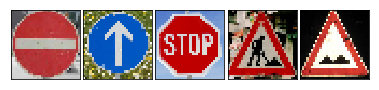

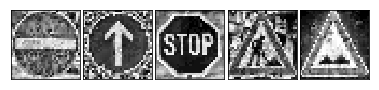

In [14]:


fig = plt.figure()
fig.set_size_inches(10,1)
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
for y in range(1,6):
    fig.add_subplot(1,10,y,xticks=[],yticks=[]).imshow(X_new[y-1])
plt.show()

#Print Grayscale
fig = plt.figure()
fig.set_size_inches(10,1)
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)


for y in range(1,6):
    fig.add_subplot(1,10,y,xticks=[],yticks=[]).imshow(X_new_pre[y-1][:,:,0], cmap="gray")
plt.show()

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    for offset in log_progress(range(0, num_examples, batch_size),every=1,size=None,name="Evaluvate"):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        p = sess.run(tf.nn.softmax(logits), feed_dict = {x: X_train,keep_prob_1 :1,keep_prob_2 : 1,keep_prob_3 : 1})
        top_5 = sess.run(tf.nn.top_k(p,k=5))
    
pred = np.array(top_5)

In [16]:
beeeeep = [label_signnames_csv.as_matrix()[indexer2][1] for indexer2 in top_5.indices[2]]
print (beeeeep)

['Stop', 'Speed limit (80km/h)', 'Speed limit (60km/h)', 'Speed limit (30km/h)', 'Speed limit (20km/h)']


### Analyze Performance

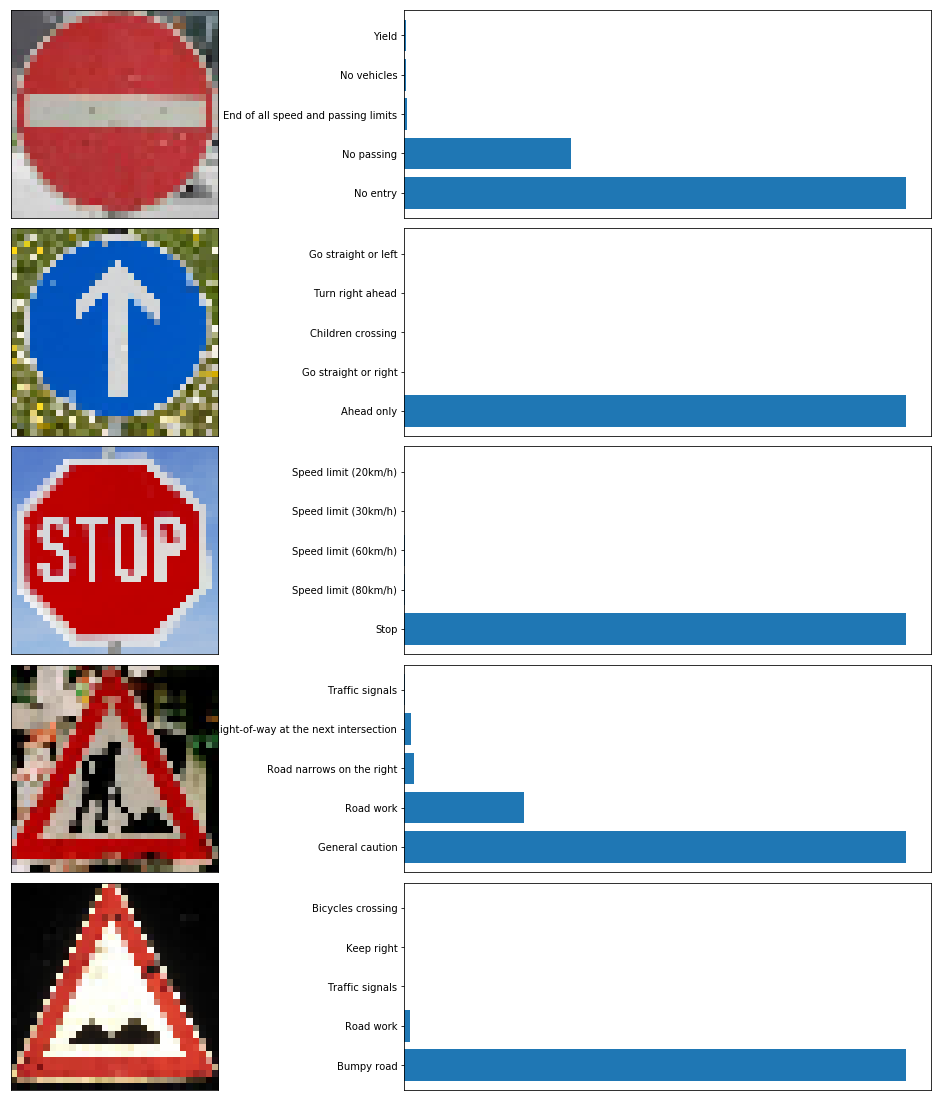

In [17]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


fig = plt.figure()
fig.set_size_inches(15,15)
fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)

for indexer in range(5):
    plt.subplot(5,2,2*indexer+1,xticks=[],yticks=[])
    plt.imshow(X_new[indexer])
    plt.subplot(5,2,2*indexer+2,xticks=[],yticks=[])
    plt.barh(np.arange(1,6,1),top_5.values[indexer,:])
    ticker =[label_signnames_csv.as_matrix()[indexer2][1] for indexer2 in top_5.indices[indexer]]
    plt.yticks(np.arange(1,6,1),ticker)
    
plt.show()


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(top_5)

TopKV2(values=array([[0.738, 0.245, 0.004, 0.003, 0.002],
       [1.000, 0.000, 0.000, 0.000, 0.000],
       [0.997, 0.002, 0.001, 0.000, 0.000],
       [0.783, 0.187, 0.014, 0.010, 0.002],
       [0.988, 0.012, 0.000, 0.000, 0.000]], dtype=float32), indices=array([[17,  9, 32, 15, 13],
       [35, 36, 28, 33, 37],
       [14,  5,  3,  1,  0],
       [18, 25, 24, 11, 26],
       [22, 25, 26, 38, 29]]))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [19]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")